# Desafio técnico

Cenário

- “Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.”
- Obs: y é a flag de cliente interessado no produto

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Aprimorando visualização
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = None

# Machine Learning
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Carregando dados
url_train = 'https://raw.githubusercontent.com/domafras/telemarketing/master/train.csv'
url_metadata = 'https://raw.githubusercontent.com/domafras/telemarketing/master/metadata.csv'

df = pd.read_csv(url_train)
df_metadata = pd.read_csv(url_metadata)

# Para utilizar arquivos do drive
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/challenge/train.csv')
#df_metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/challenge/metadata.csv')

In [4]:
df.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


Inicialmente, observa-se que:
- Valores ausentes estão representados por -999
- Ordem de grandeza discrepantes

In [5]:
# Dimensão (Linha/Coluna)
df.shape

(14123, 70)

In [6]:
# Verificando tipo atual dos dados
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

Atualmente existem apenas variáveis numéricas. 

In [7]:
# Exibe o número de valores únicos em cada variável da base de dados
df.nunique().sort_values(ascending=True)

y            2
var49        2
var50        2
var27        2
var31        2
var51        2
var44        2
var30        3
var24        3
var54        4
var9         4
var53        4
var25        5
var23        5
var22        6
var47        6
var29        6
var39        6
var33        7
var18        7
var48       10
var41       10
var26       11
var46       15
var45       16
var43       20
var57       21
var40       21
var32       24
var14       28
var28       28
var20       28
var8        29
var1        29
var38       29
var42       31
var36       33
var7        33
var17       33
var37       47
var67       59
var10       61
var52       65
var34       69
var16       77
var15       77
var2        85
var68       97
var66      181
var35      567
var56      648
var63      878
var19     1201
var13     1499
var21     1534
var65     1543
var6      1779
var3      2443
var64     3619
var12     5270
var5      6296
var60     6777
var58     8094
var59     8814
var61     9436
var62    11613
var11    1

In [8]:
# Verifica se há valores ausentes na base de dados
null_values = df.isna().sum()

if null_values.sum() == 0:
    print("Não há valores nulos no DataFrame.")
else:
    print("Existem valores nulos no DataFrame:")
    print(null_values)


Não há valores nulos no DataFrame.


Apresenta 0 nulos por não estar como NaN. Por isso, segue outra forma de análise de valores ausentes:

In [9]:
# Visualiza em ordem decrescente features com valores -999
count999 = df[df==-999].count().sort_values(ascending=False)
count999

var65    12197
var66    12197
var60     6484
var10     2339
var8      2214
var59     2182
var12     2104
var7      1895
var6      1871
var11     1719
var57     1589
var56     1587
var26     1571
var58     1571
var9      1534
var52     1534
var18     1375
var17     1375
var16     1375
var15     1375
var4       936
var3       599
var2       599
var67      586
var61      346
var68       33
var51        0
var45        0
var46        0
var47        0
var48        0
var49        0
var50        0
id           0
var63        0
var53        0
var54        0
var55        0
var62        0
var43        0
var64        0
var44        0
var35        0
var42        0
var28        0
var5         0
var13        0
var14        0
var19        0
var20        0
var21        0
var22        0
var23        0
var24        0
var25        0
var27        0
var29        0
var41        0
var30        0
var31        0
var32        0
var33        0
var34        0
var1         0
var36        0
var37        0
var38     

In [10]:
# Verifica número de linhas duplicadas
df.duplicated().sum()

0

In [11]:
# Exibe estatísticas descritivas das variáveis numéricas da base de dados
df.describe()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,17474.649366,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,-118.986688,13342.299865,3430.081144,1355.395454,19.480988,-65.831056,-65.180415,-84.422856,-93.522835,1059.038590,19.793670,1394.820435,3.478581,2.532890,0.958649,2.093181,-106.185867,0.370035,19.237485,3.644127,1.386887,0.036395,13.714508,3.141967,26.603413,394.255045,14.331162,7.585640,1.867025,3.592509,6.010338,3.096651,24.737025,6.855059,0.865751,0.275225,0.221624,0.049848,0.106068,0.343695,0.148340,0.055300,-85.239114,1.635276,1.519224,0.216031,-111.822517,-112.092123,-111.022124,-154.157900,-458.540340,-24.210294,0.073086,0.779221,0.028778,-862.721979,-862.762111,-41.252803,-2.154825,0.201798
std,10249.066602,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,392.409936,9849.807542,3079.899094,642.799261,7.511958,307.502580,307.691935,300.502638,297.389385,537.377623,7.590808,688.872118,1.813111,1.112159,0.915563,1.388681,315.879767,0.482831,8.278536,1.062332,0.556791,0.187276,4.953779,1.992664,18.793208,181.868748,12.484156,8.723957,4.066404,1.006279,4.783179,1.029761,3.432140,4.048218,0.340932,0.914687,0.803367,0.269135,0.487567,0.474957,0.355449,0.228573,319.246246,0.749654,0.714010,0.022642,315.671274,315.799354,314.158769,361.158606,497.945633,154.485314,0.053963,0.234068,0.018681,342.956927,342.855920,199.275514,48.244171,0.401357
min,1.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,8550.500000,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,14.000000,4525.500000,914.000000,811.000000,13.000000,2.000000,3.000000,3.000000,3.000000,586.000000,13.000000,796.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,15.000000,4.000000,1.000000,0.000000,10.000000,1.000000,10.000000,255.000000,2.000000,1.000000,0.000000,4.000000,2.000000,3.000000,23.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.00

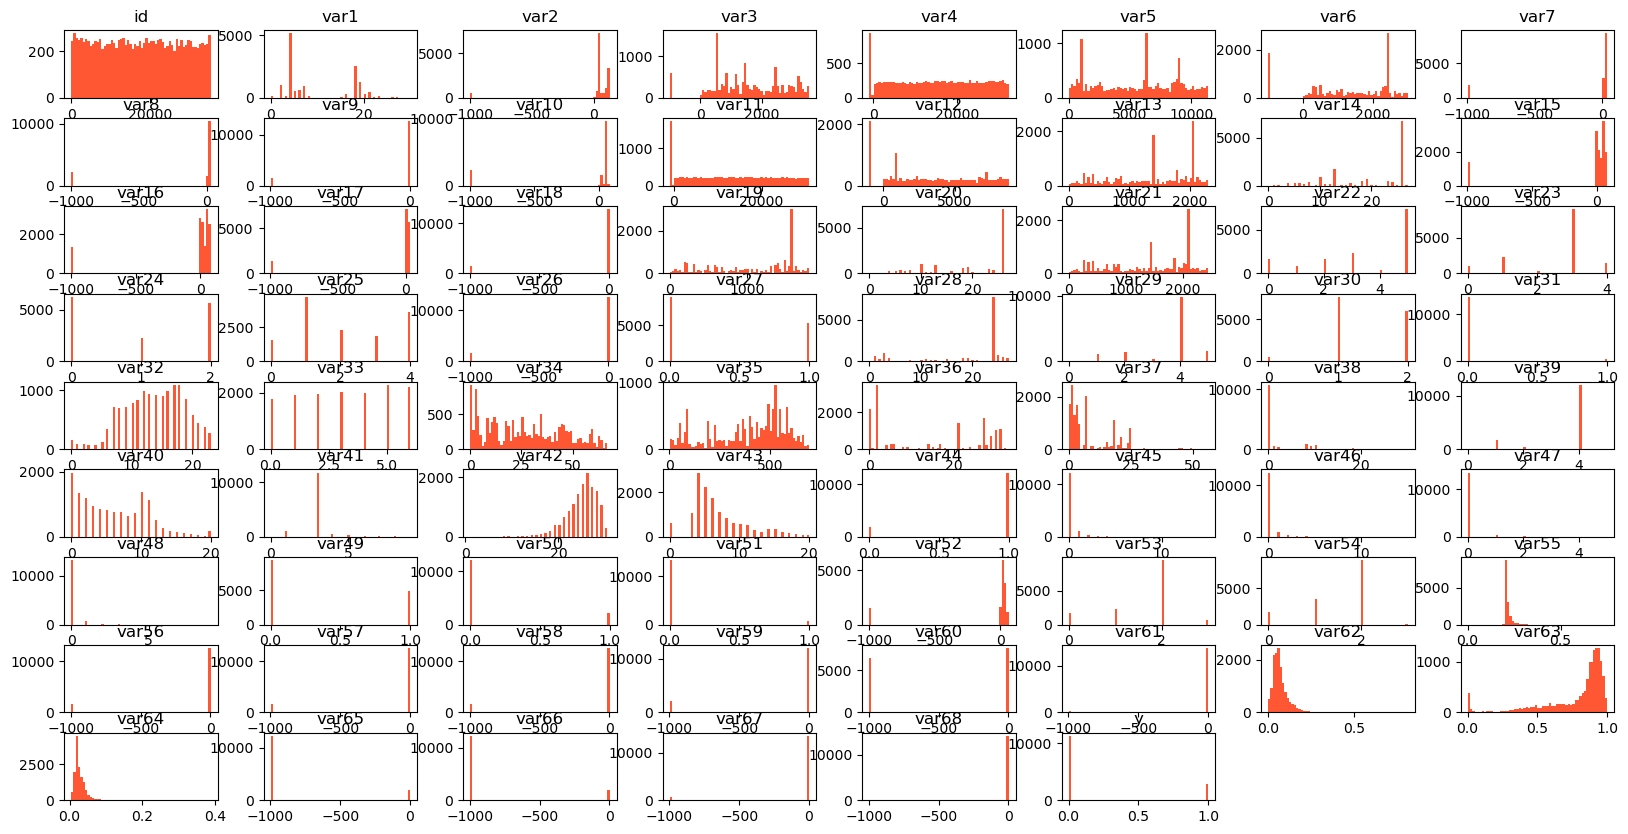

In [12]:
# Histograma
df.hist(bins=60, grid=False, figsize=(20,10), color= '#FF5733')
plt.show()

In [13]:
# Valores únicos para ID
df['id'].nunique()

14123

- Pode-se observar que o ID é único para cada exemplo, não sendo relevante ao modelo
- y, var49, var50, var27, var31, var51, var44 são features binárias
- var30, var24, var54, var9, var53, var25, var23, var22, var47, var29, var39, var33, var18 contém menos de 10 valores distintos para cada

Verificando multicolinearidade
- examinando os valores de correlação entre as variáveis binárias
- indica que são redundantes (caso sejam fortemente correlacionadas)

<AxesSubplot:>

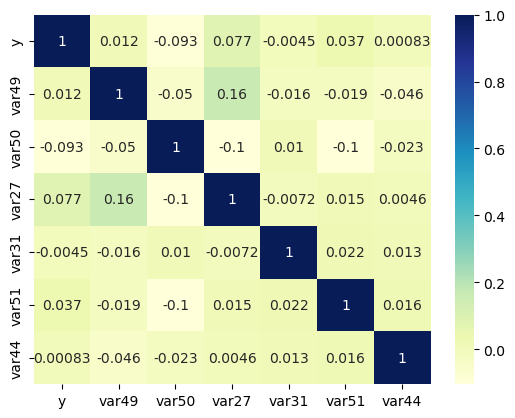

In [14]:
# Seleciona as variáveis binarias

binarias = ['y', 'var49', 'var50', 'var27', 'var31', 'var51', 'var44']
df_binarias = df[binarias]

# Calcula a matriz de correlação
sns.heatmap(df_binarias.corr(), annot=True, cmap="YlGnBu")

Percebe-se que não há multicolinearidade, já que nenhuma dessas variáveis tem forte correlação

In [15]:
# Exibe a matriz de correlação entre as variáveis da base de dados

#plt.figure(figsize=(12, 12))
#sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm')
#plt.show()

<AxesSubplot:>

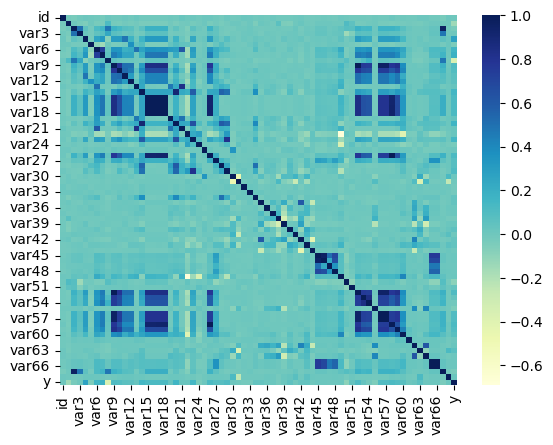

In [16]:
# Matriz de correlaçao em visualização compacta
sns.heatmap(df.corr(), cmap="YlGnBu")

In [17]:
# Verificando as estatisticas descritivas das variaveis com maior numero de valores ausentes e ID
df_missing = df[['id','var65','var66','var60','y']]
df_missing.describe()

,id,var65,var66,var60,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,17474.649366,-862.721979,-862.762111,-458.540340,0.201798
std,10249.066602,342.956927,342.855920,497.945633,0.401357
min,1.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,8550.500000,-999.000000,-999.000000,-999.000000,0.000000
50%,17464.000000,-999.000000,-999.000000,0.009003,0.000000
75%,26358.500000,-999.000000,-999.000000,0.152328,0.000000
max,35306.000000,1.000000,1.000000,1.000000,1.000000


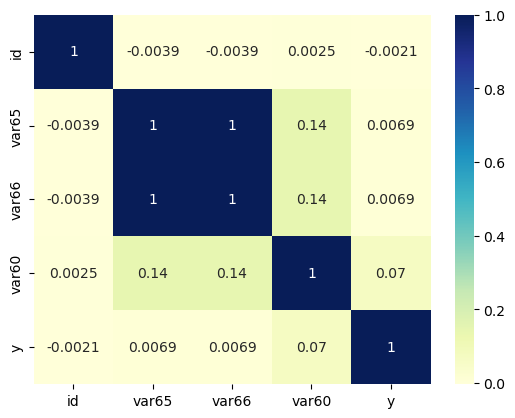

In [18]:
# Plotando a correlação entre as variáveis com muitos ausentes e y
sns.heatmap(df_missing.corr(), annot=True, cmap="YlGnBu")
plt.show()

Comparando conjunto de dados original e conjunto sem algumas variáveis
- Abordagem pode não ser precisa pois dados não foram tratados 

In [19]:
"""
df = pd.read_csv(url_train)

# separa os dados de entrada (X) e o alvo (y)
X = df.drop(columns=['y'])
y = df['y']

# divide o dataframe em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# cria o modelo
model = RandomForestClassifier()

# define o objeto StratifiedKFold para a validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# especifica as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# realiza a validação cruzada
results = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)

# imprime os resultados da validação cruzada
print("\nResultados com as variáveis originais:")
print('Accuracy:', results['test_accuracy'].mean())
print('Precision:', results['test_precision'].mean())
print('Recall:', results['test_recall'].mean())
print('F1-score:', results['test_f1'].mean())

# remove as colunas 'id', 'var60', 'var65' e 'var66'
df_drop = df.drop(columns=['id','var60', 'var65', 'var66'])

# separa os dados de entrada (X) e o alvo (y) do dataframe sem as colunas
X_drop = df_drop.drop(columns=['y'])
y_drop = df_drop['y']

# divide o dataframe sem as colunas em conjunto de treinamento e teste
X_train_drop, X_val_drop, y_train_drop, y_val_drop = train_test_split(X_drop, y_drop, test_size=0.2, random_state=42)

# cria o modelo
model_drop = RandomForestClassifier()

# define o objeto StratifiedKFold para a validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# especifica as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# realiza a validação cruzada
results2 = cross_validate(model_drop, X_train_drop, y_train_drop, cv=skf, scoring=scoring)

# imprime os resultados da validação cruzada
print("\nResultados sem as variáveis 'id', 'var60', 'var65' e 'var66':")
print('Accuracy:', results2['test_accuracy'].mean())
print('Precision:', results2['test_precision'].mean())
print('Recall:', results2['test_recall'].mean())
print('F1-score:', results2['test_f1'].mean())
"""

'\ndf = pd.read_csv(url_train)\n\n# separa os dados de entrada (X) e o alvo (y)\nX = df.drop(columns=[\'y\'])\ny = df[\'y\']\n\n# divide o dataframe em conjunto de treinamento e validação\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# cria o modelo\nmodel = RandomForestClassifier()\n\n# define o objeto StratifiedKFold para a validação cruzada\nskf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# especifica as métricas de avaliação\nscoring = [\'accuracy\', \'precision\', \'recall\', \'f1\']\n\n# realiza a validação cruzada\nresults = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)\n\n# imprime os resultados da validação cruzada\nprint("\nResultados com as variáveis originais:")\nprint(\'Accuracy:\', results[\'test_accuracy\'].mean())\nprint(\'Precision:\', results[\'test_precision\'].mean())\nprint(\'Recall:\', results[\'test_recall\'].mean())\nprint(\'F1-score:\', results[\'test_f1\'].mean())\n\n# remove 

Ao analisar o impacto dessas variáveis, há embasamento para remover essas colunas a fim de tornar o modelo menos complexo.

In [20]:
# Removendo features que não impactam o modelo
df = df.drop(['id','var65', 'var66', 'var60'], axis=1)

Representando os dados ausentes por NaN, para utilizar SimpleImputer a seguir

In [21]:
# Substituindo -999 por NaN
df.replace(to_replace=-999, value=np.nan, inplace=True)
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var61,var62,var63,var64,var67,var68,y
0,18,19.0,2853.0,29442.0,1386,2435.0,35.0,NaN,3.0,63.0,6498.0,1166.0,2007,26,13.0,11.0,11.0,4.0,1547,26,2068,1,3,0,4,7.0,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42.0,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.142303,0.056146,0.632694,0.024054,0.132353,0.139706,1
1,4,110.0,1986.0,13684.0,7189,NaN,NaN,17.0,3.0,63.0,13989.0,497.0,2289,16,1.0,3.0,3.0,3.0,1797,16,2417,5,1,2,1,6.0,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20.0,1,1,0.228784,0.308,0.305376,0.069325,0.248909,NaN,0.070991,0.773966,0.019315,0.147059,0.106618,0
2,0,39.0,1019.0,10232.0,678,791.0,16.0,NaN,3.0,63.0,9739.0,562.0,641,10,34.0,34.0,10.0,4.0,511,10,664,5,3,2,1,7.0,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12.0,1,1,0.204636,0.213,0.451613,0.018639,0.214520,0.200814,0.051046,0.980827,0.018536,0.382353,0.242647,0
3,20,39.0,1751.0,2689.0,8235,1042.0,13.0,10.0,1.0,14.0,2890.0,6541.0,811,8,59.0,60.0,23.0,5.0,624,8,839,0,0,0,0,1.0,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36.0,1,1,0.208299,0.716,0.101075,0.204753,0.349421,0.352379,0.044301,0.951564,0.023684,0.147059,0.132353,0
4,7,44.0,2262.0,29428.0,6031,304.0,16.0,NaN,3.0,63.0,13541.0,7238.0,260,10,55.0,56.0,20.0,5.0,1413,10,270,2,3,2,1,8.0,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19.0,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.226161,0.059125,0.906155,0.020733,0.455882,0.132353,1


Retornando maior valor de cada feature, a fim de verificar ordem de magnitude do conjunto de dados após a remoção dos valores -999:

In [22]:
# calcule as estatísticas descritivas para cada coluna
desc = df.describe()

# selecione apenas as linhas que contêm o mínimo, médio e máximo
desc_min_max_mean = desc.loc[['min', 'mean', 'max']]

# imprima as estatísticas descritivas para cada coluna
desc_min_max_mean

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var61,var62,var63,var64,var67,var68,y
min,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.00000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004267,0.029412,0.003676,0.000000
mean,9.712667,69.275436,1699.106256,16327.486691,5543.697869,1668.732533,28.100916,21.562348,2.407657,55.686694,15329.779265,4205.419086,1355.395454,19.480988,34.820599,35.541418,14.223486,4.141983,1059.03859,19.79367,1394.820435,3.478581,2.53289,0.958649,2.093181,5.558158,0.370035,19.237485,3.644127,1.386887,0.036395,13.714508,3.141967,26.603413,394.255045,14.331162,7.58564,1.867025,3.592509,6.010338,3.096651,24.737025,6.855059,0.865751,0.275225,0.221624,0.049848,0.106068,0.343695,0.14834,0.0553,26.104853,1.635276,1.519224,0.216031,0.490075,0.345775,0.116598,0.221588,0.270888,0.073086,0.779221,0.028778,0.206889,0.179873,0.201798
max,30.000000,129.000000,3546.000000,32403.000000,11373.000000,3001.000000,36.000000,28.000000,3.000000,85.000000,30859.000000,8800.000000,2299.000000,27.000000,78.000000,78.000000,32.000000,6.000000,1803.00000,27.00000,2436.000000,5.000000,4.00000,2.000000,4.000000,10.000000,1.000000,27.000000,5.000000,2.000000,1.000000,23.000000,6.000000,68.000000,696.000000,33.000000,56.00000,30.000000,5.000000,20.000000,9.000000,31.000000,20.000000,1.000000,15.000000,15.000000,5.000000,9.000000,1.000000,1.00000,1.0000,64.000000,3.000000,3.000000,0.750858,1.000000,1.000000,1.000000,0.913773,0.934994,0.814846,1.000000,0.387386,0.911765,1.000000,1.000000


Justificando utilizar MinMaxScaler para redimensionar valores no intervalo 0 a 1.

# Divisão dos dados: Cross Validation

Justificando a utilização do StratifiedKFold na validação cruzada:

In [23]:
# Verificando balanceamento
df['y'].value_counts()

0    11273
1     2850
Name: y, dtype: int64

Verificando o tipo raiz das variáveis para cada feature:

In [24]:
df_metadata['Variavel tipo'].value_counts()

Qualitativo nominal      36
Quantitativo discreto    18
Quantitativo continua    12
Qualitativo ordinal       4
Name: Variavel tipo, dtype: int64

Separando as colunas em categóricas e numéricas (tipo raiz), para tratamento após split (imputação de  maneira adequada):
- evitando data leakage, transformando apenas treino.

In [25]:
num = ['var24', 'var25', 'var27', 'var40', 'var44', 'var45', 'var46', 'var47',
        'var48', 'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var67', 'var68',
          'var55', 'var56', 'var57', 'var58', 'var59', 'var61', 'var62', 'var63', 'var64']

cat = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 
        'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 
          'var20', 'var21', 'var22', 'var23', 'var28', 'var29', 'var30', 'var31', 'var33', 'var34',
            'var35', 'var36', 'var37', 'var38', 'var39', 'var41', 'var26', 'var32', 'var42', 'var43']

In [26]:
# separa os dados de entrada (X) e o alvo (y)
X = df.drop(columns=['y'])
y = df['y']

# divide o dataframe em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um ColumnTransformer para aplicar transformações específicas em cada coluna
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num),
        ('cat', cat_transformer, cat)
])

# Pré-processando os dados de treinamento
X_train = preprocessor.fit_transform(X_train)

# Instanciando o objeto StratifiedKFold para cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instanciando modelo
model = HistGradientBoostingClassifier()

# Especificando as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Realizando a validação cruzada
results = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)

# Imprimindo os resultados
print('Accuracy:', results['test_accuracy'].mean())
print('Precision:', results['test_precision'].mean())
print('Recall:', results['test_recall'].mean())
print('F1-score:', results['test_f1'].mean())

Accuracy: 0.8636045003858704
Precision: 0.7316555525497228
Recall: 0.4993456516383346
F1-score: 0.5934570217535822


In [27]:
X_test.columns

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17',
       'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25',
       'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33',
       'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41',
       'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49',
       'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56', 'var57',
       'var58', 'var59', 'var61', 'var62', 'var63', 'var64', 'var67', 'var68'],
      dtype='object')

In [28]:
print(X_train.shape)
print(y_train.shape)

(11298, 65)
(11298,)


In [29]:
X_train_df = pd.DataFrame(X_train,
                          columns=['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
                                  'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
                                  'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
                                  'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
                                  'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
                                  'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
                                  'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
                                  'var57', 'var58', 'var59', 'var61', 'var62', 'var63', 'var64', 'var67', 'var68'])


X_train_df.head(10)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var61,var62,var63,var64,var67,var68
0,0.0,0.00,1.0,0.40,0.0,0.000000,0.000000,0.0,0.000,1.0,0.0,0.0,0.174603,0.666667,0.666667,0.200000,0.250923,0.280575,0.079,0.967742,0.147247,0.112972,0.142197,0.135420,0.988900,0.147144,0.133333,0.781250,0.021721,0.852822,0.634309,0.817272,0.971429,0.962963,0.0,0.738095,0.270093,0.045692,0.884298,0.962963,0.740260,0.740260,0.677419,0.8,0.872435,0.962963,0.859138,0.6,0.75,0.888889,0.8,1.0,0.0,0.666667,0.411765,0.698413,0.909091,0.375000,0.000000,0.8,0.333333,0.000000,0.304348,0.896552,0.25
1,1.0,0.25,0.0,0.20,1.0,0.000000,0.000000,0.0,0.000,0.0,0.0,1.0,0.793651,0.666667,0.666667,0.450000,0.154982,0.281282,0.141,0.833333,0.148383,0.211668,0.579533,0.047718,0.629667,0.047081,0.133333,0.976562,0.047391,0.218838,0.229755,0.050017,0.342857,0.333333,1.0,0.738095,0.931034,0.771312,0.217051,0.962963,0.935065,0.935065,0.903226,0.8,0.346090,0.296296,0.045996,0.0,0.00,0.703704,0.2,0.5,0.0,0.166667,0.161765,0.279942,0.060606,0.035714,0.000000,0.8,0.333333,1.000000,0.695652,0.793103,0.75
2,0.5,1.00,0.0,0.20,1.0,0.000000,0.000000,0.0,0.000,1.0,0.0,0.0,0.873016,0.666667,0.666667,0.033333,0.118081,0.274421,0.210,0.451613,0.015367,0.297941,0.424672,0.069157,0.885974,0.052716,0.233333,0.765625,0.930042,0.099003,0.578299,0.128043,0.285714,0.333333,1.0,0.738095,0.971934,0.594567,0.635929,0.222222,0.077922,0.103896,0.258065,0.6,0.773156,0.222222,0.135524,0.2,0.00,0.703704,0.2,1.0,0.0,0.000000,0.161765,0.542569,0.000000,0.000000,0.000000,0.8,0.333333,0.666667,0.695652,0.793103,0.25
3,0.0,1.00,1.0,0.05,1.0,0.066667,0.066667,0.0,0.125,1.0,0.0,0.0,0.269841,0.333333,0.333333,0.300000,0.095941,0.274992,0.727,0.101075,0.021123,0.143904,0.583490,0.107244,0.364279,0.072055,0.600000,0.289062,0.698449,0.276363,0.704300,0.817272,0.971429,0.962963,1.0,0.738095,0.267112,0.715958,0.884298,0.962963,0.000000,0.025974,0.064516,0.4,0.872435,0.962963,0.859138,0.6,0.75,0.888889,0.8,1.0,0.0,0.666667,0.308824,0.767677,0.060606,0.017857,0.000000,0.8,0.333333,0.444444,0.869565,0.896552,0.85
4,0.5,1.00,0.0,0.50,1.0,0.000000,0.000000,0.0,0.000,0.0,1.0,0.0,0.349206,1.000000,1.000000,0.150000,0.173432,0.272207,0.719,0.101075,0.315863,0.254685,0.234348,0.075355,0.863774,0.051415,0.600000,0.406250,0.090832,0.546122,0.541546,0.817272,0.971429,0.333333,1.0,0.738095,0.611064,0.103660,0.414093,0.370370,0.506494,0.532468,0.225806,0.6,0.043261,0.370370,0.406160,1.0,0.75,0.703704,0.2,1.0,0.0,0.500000,0.161765,0.757576,0.060606,0.321429,0.000000,0.8,0.333333,0.777778,0.304348,0.896552,0.20
5,0.5,1.00,0.0,0.30,1.0,0.000000,0.000000,0.0,0.000,1.0,0.0,0.0,0.412698,1.000000,1.000000,0.150000,0.221402,0.279947,0.424,0.172043,0.205021,0.437180,0.535451,0.101897,0.655903,0.035011,0.133333,0.289062,0.845134,0.371725,0.219555,0.758586,0.742857,0.740741,1.0,0.738095,0.321785,0.009548,0.604176,0.740741,0.701299,0.714286,0.612903,0.8,0.583472,0.703704,0.760986,0.0,0.75,0.777778,0.4,1.0,0.0,1.000000,0.235294,0.796537,0.000000,0.321429,0.000000,0.8,0.333333,0.888889,1.000000,0.896552,0.75
6,0.0,1.00,1.0,0.35,1.0,0.266667,0.200000,0.2,0.500,0.0,0.0,0.0,0.746032,0.666667,0.666667,0.466667,0.132841,0.269681,0.766,0.101075,0.081167,0.277773,0.235338,0.101448,0.678103,0.042780,0.133333,0.976562,0.418054,0.687189,0.340719,0.074358,0.971429,0.962963,1.0,0.738095,0.788988,0.481700,0.081775,0.962963,0.246753,0.311688,0.387097,0.6,0.074875,0.962963,0.080493,1.0,0.75,0.888889,0.8,1.0,0.0,0.833333,0.588235,0.712843,0.848485,0.017857,0.000000,0.8,0.333333,0.444444,0.695652,0.758621,0.35
7,1.0,0.25,1.0,0.05,1.0,0.000000,0.000000,0.0,0.000,0.0,1.0,0.0,0.539683,0.333333,0.333333,0.066667,0.095941,0.289303,0.957,0.000000,0.011817,0.118442,0.

Verificando se os dados de treino foram transformados (Treino X Teste)

In [30]:
# Imprime os primeiros 5 exemplos dos dados de treinamento
print('Dados de Treinamento:')
print([X_train[:1]])

# Imprime os primeiros 5 exemplos dos dados de teste
print('Dados de Teste:')
print(X_test[:1])

Dados de Treinamento:
[array([[0.        , 0.        , 1.        , 0.4       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.17460317, 0.66666667, 0.66666667,
        0.2       , 0.25092251, 0.2805748 , 0.079     , 0.96774194,
        0.14724708, 0.11297248, 0.14219729, 0.13542029, 0.9889001 ,
        0.14714414, 0.13333333, 0.78125   , 0.02172073, 0.85282227,
        0.63430933, 0.81727242, 0.97142857, 0.96296296, 0.        ,
        0.73809524, 0.27009334, 0.0456922 , 0.88429752, 0.96296296,
        0.74025974, 0.74025974, 0.67741935, 0.8       , 0.87243483,
        0.96296296, 0.85913758, 0.6       , 0.75      , 0.88888889,
        0.8       , 1.        , 0.        , 0.66666667, 0.41176471,
        0.6984127 , 0.90909091, 0.375     , 0.        , 0.8       ,
        0.33333333, 0.        , 0.30434783, 0.89655172, 0.25      ]])]
Dados de Teste:
       var1  var2    var3     var4  var5  var6  var7  var8  var9  var10  \

## Feature Selection

Utilizando Feature Engine:

In [31]:
!pip install feature_engine

# DropConstantFeature
from feature_engine.selection import DropConstantFeatures

# DropCorrelatedFeature
from feature_engine.selection import SmartCorrelatedSelection

# Recursive Feature Elimination
from feature_engine.selection.recursive_feature_elimination import RecursiveFeatureElimination

# feature Selection
from sklearn.feature_selection import SelectFromModel

In [32]:
# Adicionando as etapas de seleção de recursos ao pipeline 
pipeline = Pipeline([
    ('constant_features', DropConstantFeatures(tol=0.99)),
    ('correlated_features', SmartCorrelatedSelection(threshold=0.8, method='pearson')),
    ('feature_importance', SelectFromModel(RandomForestClassifier(random_state=42)))
])

# Aplicando o pipeline nos dados de treinamento novamente
X_train_selected = pipeline.fit_transform(X_train, y_train)

# Instanciando o modelo com os parâmetros desejados
model = HistGradientBoostingClassifier()

# Treinando o modelo nos dados de treinamento selecionados
model.fit(X_train_selected, y_train)

# Instanciando o objeto StratifiedKFold para a validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Especificando as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Realizando a validação cruzada com as métricas especificadas
cv_results = cross_validate(model, X_train_selected, y_train, cv=skf, scoring=scoring)

# Imprimindo os resultados médios das métricas de avaliação
print('Accuracy:', cv_results['test_accuracy'].mean())
print('Precision:', cv_results['test_precision'].mean())
print('Recall:', cv_results['test_recall'].mean())
print('F1-score:', cv_results['test_f1'].mean())

Accuracy: 0.8618345105321096
Precision: 0.7362641202988561
Recall: 0.4789307711258931
F1-score: 0.5801865532586777


# Model training

**Resampling**

In [33]:
X_train_selected

array([[0.17460317, 0.2       , 0.25092251, ..., 0.6984127 , 0.30434783,
        0.89655172],
       [0.79365079, 0.45      , 0.15498155, ..., 0.27994228, 0.69565217,
        0.79310345],
       [0.87301587, 0.03333333, 0.11808118, ..., 0.54256854, 0.69565217,
        0.79310345],
       ...,
       [0.61904762, 0.3       , 0.10332103, ..., 0.71284271, 0.43478261,
        0.75862069],
       [0.68253968, 0.65      , 0.11439114, ..., 0.12698413, 0.69565217,
        0.82758621],
       [0.3015873 , 0.3       , 0.22140221, ..., 0.07070707, 0.26086957,
        0.62068966]])

In [34]:
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("HistGradientBoostingClassifier", HistGradientBoostingClassifier())
]

# Resampling dos dados de treinamento
ros = RandomOverSampler(random_state=42) # gera novas amostras para clase minoritaria
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_selected, y_train)

# Realizando a validação cruzada com os dados resampleados para cada modelo
for name, model in models:
    results_resampled = cross_validate(model, X_train_resampled, y_train_resampled, cv=skf, scoring=scoring)
    
    # Imprimindo as métricas para cada modelo
    print(f"\nMetricas para {name}:")
    print('Accuracy:', results_resampled['test_accuracy'].mean())
    print('Precision:', results_resampled['test_precision'].mean())
    print('Recall:', results_resampled['test_recall'].mean())
    print('F1-score:', results_resampled['test_f1'].mean())


Metricas para Decision Tree:
Accuracy: 0.9121614151464896
Precision: 0.8638108224043934
Recall: 0.978662244333886
F1-score: 0.9176491049704933

Metricas para Random Forest:
Accuracy: 0.966390270867883
Precision: 0.954462524785162
Recall: 0.9795467108899943
F1-score: 0.9668323931851605

Metricas para K-Nearest Neighbors:
Accuracy: 0.7597014925373134
Precision: 0.71461308367729
Recall: 0.8648977335544499
F1-score: 0.7825539541299195

Metricas para Naive Bayes:
Accuracy: 0.6620232172470979
Precision: 0.6363106661490583
Recall: 0.756661138750691
F1-score: 0.6912498674139915

Metricas para HistGradientBoostingClassifier:
Accuracy: 0.8823659480375898
Precision: 0.8744026520684093
Recall: 0.8932006633499171
F1-score: 0.8836580253504698


Número de amostras por classe antes do ROS: [9045 2253]
Número de amostras por classe após o ROS: [9045 9045]


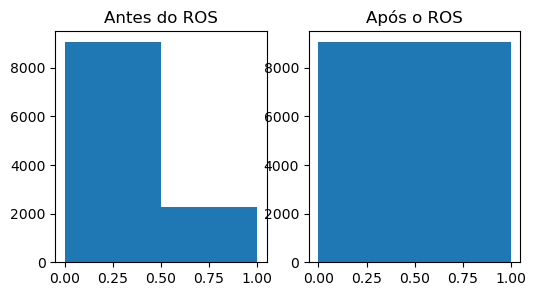

In [35]:
# Contando o número de amostras em cada classe antes e depois do ROS
print("Número de amostras por classe antes do ROS:", np.bincount(y_train))
print("Número de amostras por classe após o ROS:", np.bincount(y_train_resampled))

# Plotando um histograma das classes antes e depois do ROS
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.subplot(121)
plt.hist(y_train, bins=2)
plt.title("Antes do ROS")
plt.subplot(122)
plt.hist(y_train_resampled, bins=2)
plt.title("Após o ROS")
plt.show()

**GridSearch**

In [36]:
# Separando em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Definindo os modelos para avaliar
models = [
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 7, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': [None, 'balanced']
        }
    },
    {
        'name': 'HistGradientBoosting Classifier',
        'model': HistGradientBoostingClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1, 1],
            'max_iter': [50, 100, 200],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'name': 'Random Forest Classifier',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt']
        }
    },
    {
        'name': 'K-Neighbors Classifier',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
]

In [38]:
# Loop sobre os modelos para ajustá-los com GridSearchCV
for model in models:
  print(f"\nTreinando {model['name']}...")
  # Instanciando o objeto GridSearchCV
  grid_search = GridSearchCV(
      model['model'],
      param_grid=model['params'],
      cv=StratifiedKFold(n_splits=3),
      scoring='recall')
  
  # Treinando com GridSearchCV no conjunto de treino
  grid_search.fit(X_train, y_train)

  # Avaliando performance no conjunto de teste e exibindo outras métricas
  y_pred = grid_search.predict(X_test)
  print(f"Performance no conjunto de teste para {model['name']}:")
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

  # Armazenando o melhor modelo encontrado e seus hiperparâmetros
  model['best_model'] = grid_search.best_estimator_
  model['best_params'] = grid_search.best_params_


Treinando Decision Tree...
Performance no conjunto de teste para Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1831
           1       0.80      0.84      0.82      1787

    accuracy                           0.81      3618
   macro avg       0.81      0.81      0.81      3618
weighted avg       0.81      0.81      0.81      3618

[[1449  382]
 [ 292 1495]]

Treinando HistGradientBoosting Classifier...
Performance no conjunto de teste para HistGradientBoosting Classifier:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1831
           1       0.88      0.97      0.92      1787

    accuracy                           0.92      3618
   macro avg       0.92      0.92      0.92      3618
weighted avg       0.92      0.92      0.92      3618

[[1594  237]
 [  55 1732]]

Treinando Random Forest Classifier...
Performance no conjunto de teste para Random Forest Cla

# Métricas

Contexto do problema: classificação binária, entre classes do cliente interessado ou desinteressado.

Considerando o negócio, se o custo de perder um cliente em potencial for maior que o custo de entrar em contato com um cliente não interessado, é importante maximizar a sensibilidade.
Entretanto, caso o custo de entrar em contato com um cliente não interessado for alto, é importante maximizar a precisão.

**Acurácia:** pode não ser a melhor métrica, considerando que o conjunto de dados é desbalanceado. Ou seja, a base tem muito mais cliente NÃO INTERESSADOS do que aos que TEM INTERESSE, portanto, um modelo mesmo prevendo sempre 0 (não interesse), teria alta precisão mas seria inútil para casos de interesse.

**Precisão:** indica quantos clientes identificados como potencial, realmente são interessados no produto ou serviço oferecido. Maximizar a precisão é importante quando o custo de entrar em contato com um cliente não interessado é alto, de maneira a evitar gastos desnecessários com clientes que não estão dispostos a comprar.

**Recall:** indica quantos clientes em potencial foram identificados (ligação) em relação ao total de clientes em potencial. Dessa maneira, maximizar o Recall é importante quando o custo de perder um cliente em potencial é alto, pois se a empresa não ligar para esse cliente, pode perder um negócio que estava na mão.

**F1:** se ao negócio, ambas as métricas acima são importantes, é interessante equilibrá-las.

Qual a melhor métrica dependerá do contexto do problema e negócio e das consequências de cada tipo de erro (falso positivo ou falso negativo). Resumindo, se o custo de perder um cliente em potencial for maior que o custo de entrar em contato com um cliente não interessado, é importante maximizar o recall. Por outro lado, se o custo de entrar em contato com um cliente não interessado for alto, é importante maximizar a precisão.

####  Matriz de confusão

Matriz de Confusão:
[[1749   82]
 [  41 1746]]


<AxesSubplot:>

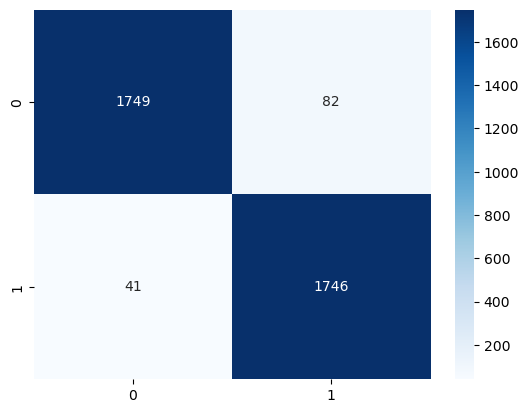

In [44]:
# Obtendo as previsões do melhor modelo (RFC) encontrado
y_pred_best = models[2]['best_model'].predict(X_test)

# Calculando a matriz de confusão para as previsões do melhor modelo (RFC)
cm = confusion_matrix(y_test, y_pred_best)
print("Matriz de Confusão:")
print(cm)

# Plotando a matriz de confusão como heatmap
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues')